#Удирдуулаагүй сургалт - Unsupervised learning 


##Кластер (Clustring)
Кластер Clustering нь өгөгдлийн үл мэдэгдэх дэд бүлгүүдийг илрүүлэх даалгавар бөгөөд бид үүнийг clusters гэж нэрлэдэг. Өөрөөр хэлбэл, зорилго нь өгөгдлийг "ижил төстэй" зүйлээр нэг кластерт, "ялгаатай" зүйл нь өөр кластерт хуваах явдал юм.

*   Кластер гэдэг нь өгөгдөл доторх адил бүлгүүдийг олох техник юм.
*   Удирдуулаагүй сургалтын гол аргуудын нэг

Жишээ:
*   Нийгмийн сүлжээний шинжилгээ: Холбоодыг (Community) олоход кластер хийх боломжтой
*   Экологи: организмуудыг төрөл зүйл, ген гэх мэт шинж чанаруудаар нь хуваах...
*   Цифр нь тодорхойгүй гараар бичсэн цифрүүдийг ангилах

Кластерингийн алгоритмууд 
*   Хуваагдсан кластер
*   Шаталсан кластер
*   K - дундаж кластеринг (K-means clustering)
        * зай (distance)
             * Адил(similarity), ондоо (dissimilarity)








Кластерийн чанар

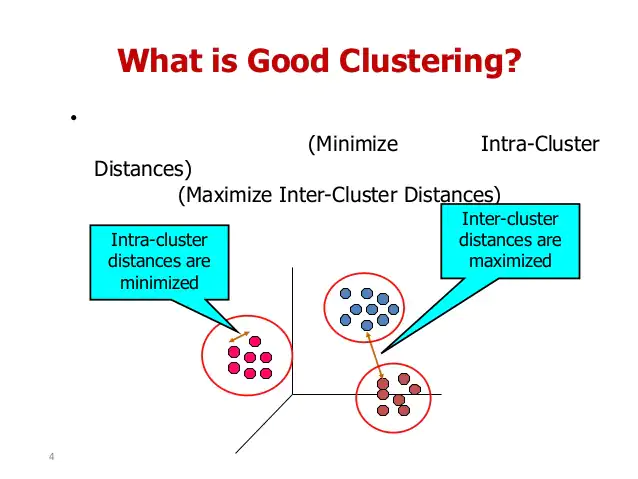

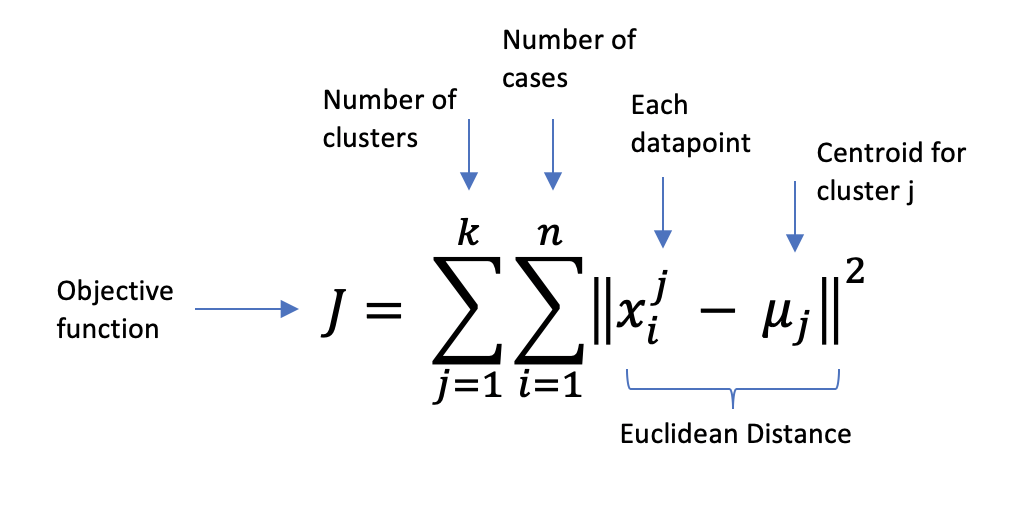

K - means аргын шинж чанар ба гүйцэтгэл

> Гүйцэтгэл O(n * k * d * i):
 
*   n is the number of items,
*   k is the number of clusters
*   d is the number of dimensions of the feature vectors
*   i is the number of iterations needed until convergence.













### Жишээ 

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

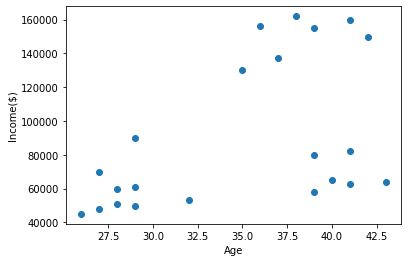

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
# 3 cluster
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [ ]:
# centroid буюу төв цэг
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

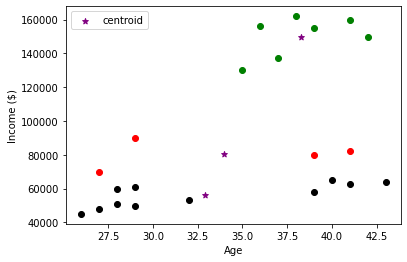

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Preprocessing using min max scaler

In [ ]:
# Үүнд шугаман регресс гэх мэт оролтын жигнэсэн нийлбэрийг ашигладаг алгоритмууд болон k-хамгийн ойрын хөрш гэх мэт зайны хэмжүүр ашигладаг алгоритмууд орно.
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


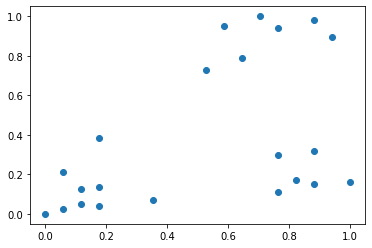

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

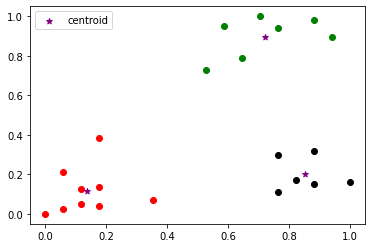

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot

Elbow plot аргын хувьд кластерын тоог (K) 1-ээс 10 хүртэл өөрчилдөг. 

WCSS (Within-Cluster Sum of Square) 

WCSS гэдэг нь кластер дахь цэг болон төв хэсгийн хоорондох зайны квадратын нийлбэр юм. 

WCSS-ийг K утгаар зурахад график нь тохой шиг харагдана.

Кластерын тоо нэмэгдэх тусам WCSS-ийн утга буурч эхэлнэ. 

WCSS утга нь K = 1 үед хамгийн их байна. 

Графикийг шинжлэхэд график нэг цэгт хурдан өөрчлөгдөж, тохойн хэлбэр үүсэхийг харж болно. Энэ үеэс эхлэн график X тэнхлэгтэй бараг параллель хөдөлж эхэлнэ. Энэ цэгт харгалзах K утга нь оновчтой K утга буюу кластерын оновчтой тоо юм.

SSE нь төв ба кластерын гишүүн бүрийн хоорондох квадрат зайны нийлбэрээр тодорхойлогддог. 

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

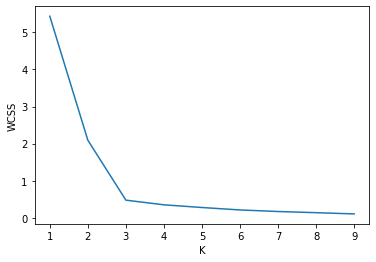

In [ ]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,sse)

### Жишээ 2

fit() сургалтын өгөгдлөөс загвар бүтээх (жишээ нь кмеануудын хувьд төвийг олдог)

predict() загвар бүтээсний дараа өгөгдөлд label онооно,

fit_predict() хоёулаа ижил өгөгдөл дээр ажилладаг (жишээ нь kmean-ийн хувьд энэ нь центроидуудыг олж, өгөгдлийн багцад label оноодог).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# дата үүсгэх
dataset = make_blobs(n_samples = 200, centers = 4, n_features = 2, cluster_std = 1.6, random_state = 50)

In [ ]:
points = dataset[0]

In [ ]:
# k means
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(points)

KMeans(n_clusters=4)

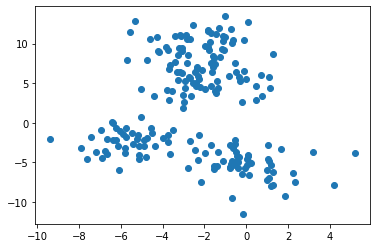

In [ ]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [ ]:
clusters = kmeans.cluster_centers_

In [ ]:
print(clusters)

[[ 0.05161133 -5.35489826]
 [-2.40167949 10.17352695]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]]


In [ ]:
y_km = kmeans.fit_predict(points)


In [ ]:
plt.scatter(points[y_km == 0,0], points[y_km == 0,1], s = 50, color='red')
plt.scatter(points[y_km == 1,0], points[y_km == 1,1], s = 50, color='green')
plt.scatter(points[y_km == 2,0], points[y_km == 2,1], s = 50, color='yellow')
plt.scatter(points[y_km == 3,0], points[y_km == 3,1], s = 50, color='cyan')

plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.show()

NameError: ignored

###SciKit Learn сан ашиглан K - Means аргыг хэрэгжүүлэх

In [ ]:
import numpy as np

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])



####Жишээ 1 Эхлээд бид gaussian blobs үүсгэдэг функц ашиглан өгөгдлөө үүсгэнэ.

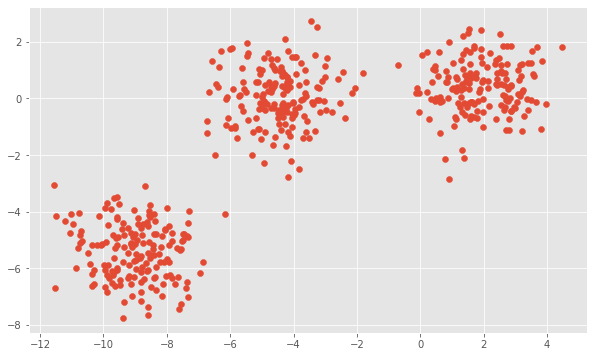

In [ ]:
n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

plt.scatter(X[:, 0], X[:, 1],  marker="o");

Дараах параметр утгуудтай scikit-learn KMeans функцийг хэрэгжүүлнэ
*   n_clusters: k = 3 clusters
*   n_init: only one initialization
*   init: random initialization
*   max_iter: only one iteration

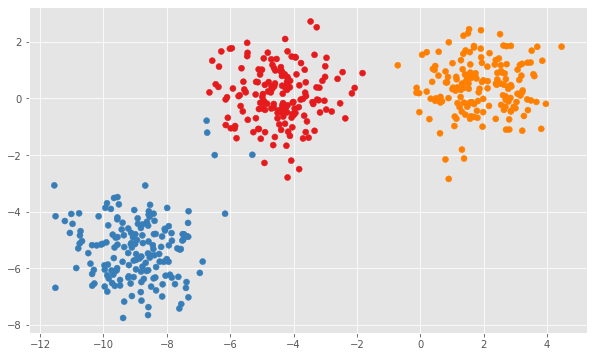

In [ ]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Үр дүн нь центроидуудыг санамсаргүй байдлаар эхлүүлэхээс ихээхэн хамаардаг.

Хэрэв бид давталтын хамгийн дээд тоог 5 гэж тохируулбал зарим сайжруулалтыг харж болно.

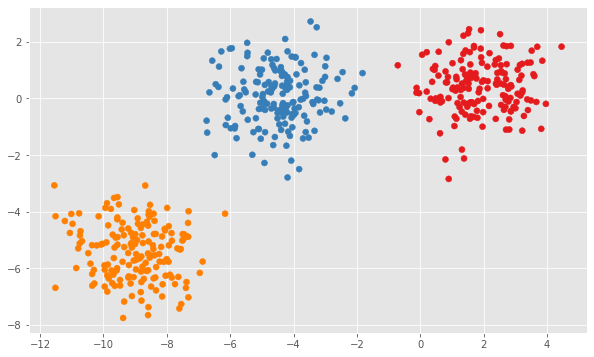

In [ ]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

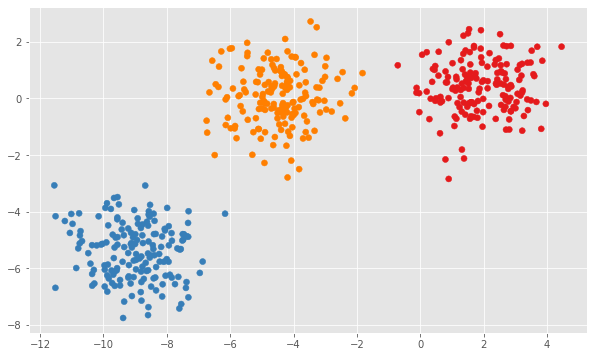

In [ ]:
y_pred = KMeans(n_clusters=3, max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

**Илүү төвөгтэй датасэт**

intra-cluster нийт зай нь дараах кластерийн таамаглалыг бий болгодог:
*   conver
*   isotropic (uniform in all orientations).

Up to now, we've applied the algorithm only to nice, Gaussian blobs of equal size. Let's see what the algorithm does for point sets that
*   vary in size
*   vary in variance
*   are anisotropic
*   are non-convex.















#####Varying Size

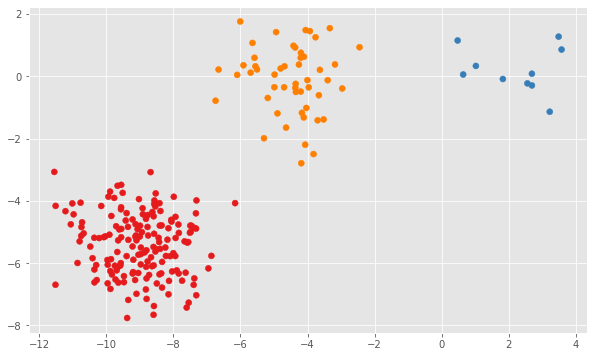

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

X_filtered = np.vstack((X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3).fit_predict(X_filtered)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,  marker="o", cmap=cmap);

K-Means нь жигд бус хэмжээтэй цэгүүдэд тохиромжтой

#####Anisotropic point clouds

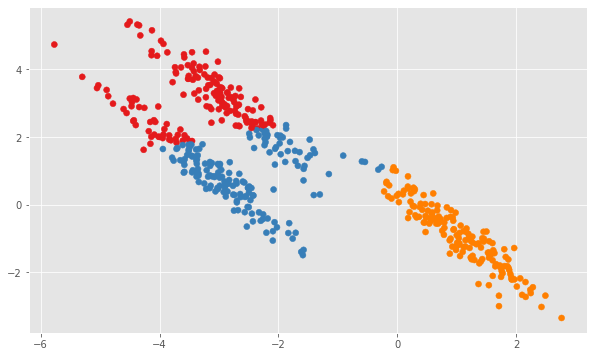

In [ ]:
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,  marker="o", cmap=cmap); 

k-means алгоритм anisotropic point clouds дээр үр дүнтэй биш болох нь харагдаж байна.

#####Non-convex point clouds

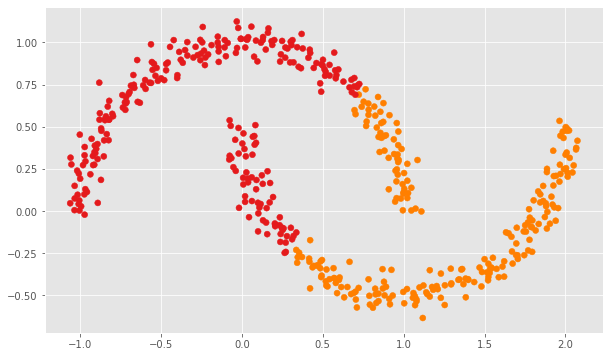

In [ ]:
X_moons, y = make_moons(n_samples=n_samples, noise=.05)

y_pred = KMeans(n_clusters=2).fit_predict(X_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap);

k-means арга нь non-convex point clouds дээр сайн ажилладаггүй.

#####K-means аргад k сонгох

k
-means нь 
k
 параметрийн сонголтод маш мэдрэг байдаг.

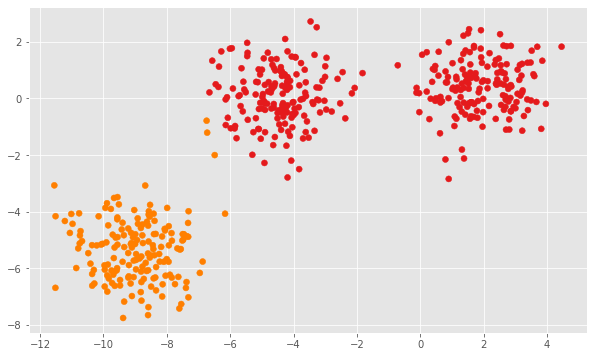

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

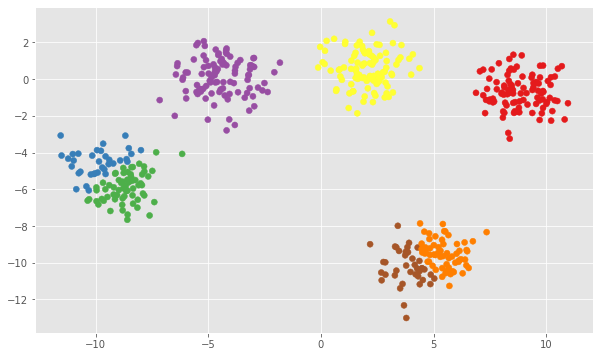

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)
y_pred = KMeans(n_clusters=7).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

**К хэрхэн сонгох вэ?** Ideas:

1. Visual comparison


*   Looking for at which k the total intra-cluster distance tapers off.
*   Silhouette analysis

Эхний арга нь feature векторууд хоёр хэмжээст байх үед хэрэг болох боловч өгөгдлийг илүү өндөр хэмжээстээр дүрслэн харуулахад хэцүү байдаг. Нөгөө хоёр санааг авч үзье.

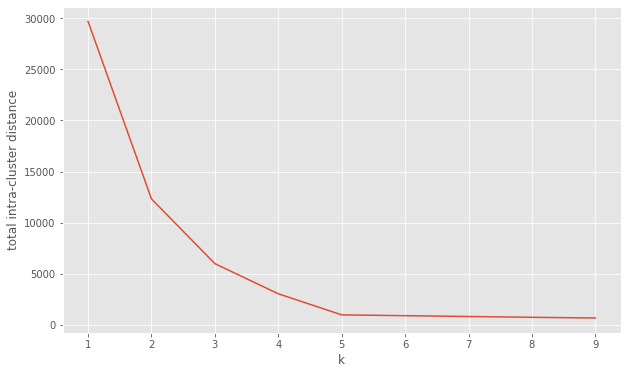

In [ ]:
# clustering for k = 1 to k = 10
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

####Жишээ Iris dataset

Iris мэдээллийн багцыг илүү өндөр хэмжээст жишээн дээр k-means хэр сайн болохыг авч үзэх болно.

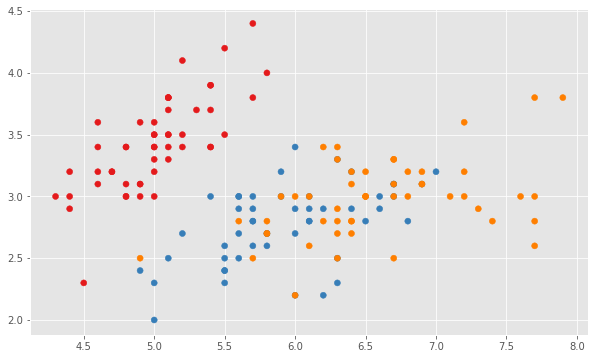

In [ ]:
iris = load_iris()
X = iris.data
Y_iris_gt = iris.target

plt.scatter(X[:, 0], X[:, 1], c=Y_iris_gt,  marker="o", cmap=cmap);

Priciple Component Analysis (PCA) Одоо бүх боломжуудыг (хэмжээ) ашиглан кластер хийх алгоритмыг ажиллуулж, үр дүнгийн графикийг авч үзье.

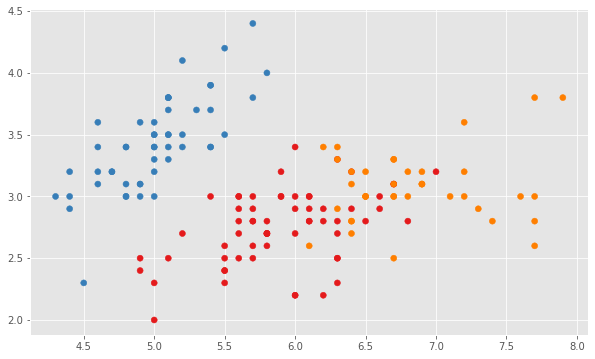

In [ ]:
y_iris_pred = KMeans(n_clusters=3,n_init=100).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_iris_pred,  marker="o", cmap=cmap);

In [ ]:
print(y_iris_pred)
print(Y_iris_gt)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Evaluating cluster quality with known ground-truth labels

v = 2 * (homogeneity * completeness) / (homogeneity + completeness)

In [ ]:
metrics.homogeneity_completeness_v_measure(Y_iris_gt,y_iris_pred)

(0.7514854021988339, 0.7649861514489816, 0.7581756800057786)

**Бусад clustering алгоритмууд ба ideas**

k-means гадна олон төрлийн алгоритмууд байдаг.

Хуваалтын алгоритм

*   Өгөгдлийг бинүүдийн олонлог болгон хуваана
*   бин (bins) гараар тохируулах (e.g., k-means) эсвэл автоматаар тодорхойлох (e.g., affinity propagation)

Шаталсан алгоритм
*   dendrogram буюу "similarity tree" үүсгэх,
*   Кластеруудыг dendrogram -ыг "cutting" хийх замаар үүсгэдэг

Bi-Clustering

*   Clusters dimensions & records

Fuzzy clustering

*   probabilistic cluster assignment allows occurrence of elements in multiples clusters

Эдгээрийн альнийг ч scikit-learn Here ашиглан хэрэгжүүлэх боломжтой